In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime


In [16]:
#read in twitter data from Elon Musk's account
df_elon=pd.read_csv("../../data/twitter/Elon_0402.csv")

In [17]:
df_elon.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,elonmusk,2019/4/2 20:38,993,9263,Dogecoin value may vary https://www. theonion....,NaN,NaN,NaN,1.113180e+18,https://twitter.com/elonmusk/status/1113178951...
1,elonmusk,2019/4/2 20:16,7238,55271,Dogecoin rulz pic.twitter.com/flWWUgAgLU,NaN,NaN,NaN,1.113170e+18,https://twitter.com/elonmusk/status/1113173498...
2,elonmusk,2019/4/2 19:40,368,9159,Uh oh,NaN,NaN,NaN,1.113160e+18,https://twitter.com/elonmusk/status/1113164389...
3,elonmusk,2019/4/2 9:24,1317,6176,Dogecoin might be my fav cryptocurrency. It‚Äô...,NaN,NaN,NaN,1.113010e+18,https://twitter.com/elonmusk/status/1113009339...
4,elonmusk,2019/4/2 9:21,1557,26925,Yup https:// twitter.com/nasa/status/11 128601...,NaN,NaN,NaN,1.113010e+18,https://twitter.com/elonmusk/status/1113008497...


In [18]:
df_elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6124 entries, 0 to 6123
Data columns (total 10 columns):
username     6124 non-null object
date         6124 non-null object
retweets     6124 non-null int64
favorites    6124 non-null int64
text         6091 non-null object
geo          9 non-null object
mentions     543 non-null object
hashtags     47 non-null object
id           4029 non-null float64
permalink    4029 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 478.5+ KB


In [19]:
#obatining datetime, year, month and day of week for each tweet
df_elon['DateTime'] = pd.to_datetime(df_elon['date'])

df_elon['year']= df_elon['DateTime'].dt.year
df_elon['month']=df_elon['DateTime'].dt.month
df_elon['day']=df_elon['DateTime'].dt.day
df_elon.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,DateTime,year,month,day
0,elonmusk,2019/4/2 20:38,993,9263,Dogecoin value may vary https://www. theonion....,NaN,NaN,NaN,1.113180e+18,https://twitter.com/elonmusk/status/1113178951...,2019-04-02 20:38:00,2019,4,2
1,elonmusk,2019/4/2 20:16,7238,55271,Dogecoin rulz pic.twitter.com/flWWUgAgLU,NaN,NaN,NaN,1.113170e+18,https://twitter.com/elonmusk/status/1113173498...,2019-04-02 20:16:00,2019,4,2
2,elonmusk,2019/4/2 19:40,368,9159,Uh oh,NaN,NaN,NaN,1.113160e+18,https://twitter.com/elonmusk/status/1113164389...,2019-04-02 19:40:00,2019,4,2
3,elonmusk,2019/4/2 9:24,1317,6176,Dogecoin might be my fav cryptocurrency. It‚Äô...,NaN,NaN,NaN,1.113010e+18,https://twitter.com/elonmusk/status/1113009339...,2019-04-02 09:24:00,2019,4,2
4,elonmusk,2019/4/2 9:21,1557,26925,Yup https:// twitter.com/nasa/status/11 128601...,NaN,NaN,NaN,1.113010e+18,https://twitter.com/elonmusk/status/1113008497...,2019-04-02 09:21:00,2019,4,2


In [20]:
#dropping NaN columns and adding DATE column 
df_elon_short=df_elon[["retweets","favorites","text","DateTime","year","month","day"]].dropna()
df_elon_short['DATE'] = pd.to_datetime(df_elon_short['DateTime'].dt.date)
df_elon_short.head()

,retweets,favorites,text,DateTime,year,month,day,DATE
0,993,9263,Dogecoin value may vary https://www. theonion....,2019-04-02 20:38:00,2019,4,2,2019-04-02
1,7238,55271,Dogecoin rulz pic.twitter.com/flWWUgAgLU,2019-04-02 20:16:00,2019,4,2,2019-04-02
2,368,9159,Uh oh,2019-04-02 19:40:00,2019,4,2,2019-04-02
3,1317,6176,Dogecoin might be my fav cryptocurrency. It‚Äô...,2019-04-02 09:24:00,2019,4,2,2019-04-02
4,1557,26925,Yup https:// twitter.com/nasa/status/11 128601...,2019-04-02 09:21:00,2019,4,2,2019-04-02


In [21]:
#sort by number of retweets
df_elon_short_sort=df_elon_short.sort_values(by=["retweets"],ascending=False).reset_index(drop=True)
df_elon_short_sort.head()

,retweets,favorites,text,DateTime,year,month,day,DATE
0,387919,1204279,Had to been done ur welcome pic.twitter.com/7j...,2018-10-19 21:01:00,2018,10,19,2018-10-19
1,218046,521779,Am departing presidential councils. Climate ch...,2017-06-01 20:02:00,2017,6,1,2017-06-01
2,168012,473885,View from SpaceX Launch Control. Apparently,2018-02-06 21:44:00,2018,2,6,2018-02-06
3,166398,681744,There are no coincidences pic.twitter.com/9AEb...,2019-01-03 23:04:00,2019,1,3,2019-01-03
4,151923,470847,i anime,2018-10-22 22:33:00,2018,10,22,2018-10-22


# Investigate if Elon Musk Stepping Down From Chairman Affected TSLA Stock Price


In [78]:
#we know for certain SEC mandated Elon Musk to step down as chairman on 9/27, and new chairwoman took over in early November
#so we want to keep tweets from 9/27 till a few weeks after early Nov to analyze the impact of this event on TSLA stock price
df_elon_chairman=df_elon_short_sort[(df_elon_short_sort['DateTime']<"2018-12-01") & (df_elon_short_sort['DateTime'] >"2018-09-26")].reset_index(drop=True)
df_elon_chairman

,retweets,favorites,text,DateTime,year,month,day,DATE
0,387919,1204279,Had to been done ur welcome pic.twitter.com/7jT0f9lqIS,2018-10-19 21:01:00,2018,10,19,2018-10-19
1,151923,470847,i anime,2018-10-22 22:33:00,2018,10,22,2018-10-22
2,90166,465965,Rest in peace,2018-11-12 19:26:00,2018,11,12,2018-11-12
3,85163,384662,How‚Äôd they know!? pic.twitter.com/AZh4EOrgmc,2018-10-25 06:46:00,2018,10,25,2018-10-25
4,70936,336492,Send me ur dankest memes!!,2018-10-25 17:52:00,2018,10,25,2018-10-25
5,61292,247383,It is time to create a mecha,2018-10-14 08:28:00,2018,10,14,2018-10-14
6,51379,239770,Twitter is Dark Souls of social media. Reddit is Bloodborne. Insta is Zelda.,2018-10-21 21:01:00,2018,10,21,2018-10-21
7,39044,149880,We know we‚Äôll run out of dead dinosaurs to mine for fuel & have to use sustainable energy eventually,2018-11-10 21:19:00,2018,11,10,2018-11-10
8,28283,176003,Tesla exists to help reduce risk of catastrophic climate change,2018-10-12 18:03:00,2018,10,12,2018-10-12
9,28018,190918,You can summon your Tesla from your phone. Only short distances today,2018-11-29 02:25:00,2018,11,29,2018-11-29


In [79]:
#filter tweets using "Tesla"
df_elon_chairman['DATE'] = pd.to_datetime(df_elon_chairman['DateTime'].dt.date)
df_elon_events=df_elon_chairman[df_elon_chairman["text"].str.match("Tesla")].drop(columns=['DateTime', 'year', 'month', 'day'])
df_elon_events

,retweets,favorites,text,DATE
8,28283,176003,Tesla exists to help reduce risk of catastrophic climate change,2018-10-12
48,6722,48608,Teslaquila coming soon ‚Ä¶ https:// twitter.com/CNBCi/status/1 050771311600041985 ‚Ä¶,2018-10-12
71,4012,52576,Tesla Autopilot Drive on Navigation going to wide release in North America tonight,2018-10-27
73,3842,44361,Tesla advanced Summon ready in ~6 weeks! Just an over-the-air software upgrade,2018-11-01
81,3507,26645,Tesla owners can refer someone to buy a Tesla & get any image they want laser etched in glass & sent to deep space for millions of years https:// twitter.com/Teslarati/stat us/1048112638402674688 ‚Ä¶,2018-10-05
105,2405,32021,Tesla Supercharger capacity will double by end of next year. Expect to be within range of 95% to 100% of population in all active markets.,2018-11-19
115,1951,21051,Tesla just acquired trucking capacity to ensure Model 3 can be delivered in US by Dec 31 if ordered by Nov 30 https:// 3.tesla.com/model3/design#battery ‚Ä¶,2018-11-15
159,721,13526,Tesla rear wheel drive cars do actually work well on snow & ice. We did our traction testing on an ice lake! Dual motor AWD is great,2018-10-18
162,686,10916,Tesla owner shows how well ultrawhite seats hold up after 25,2018-10-07
262,104,1454,Tesla Autopilot team is awesome! Got to make sure we iron out the details though. Long tail of tricky edge cases. Important to get front wide angle,2018-10-02


In [80]:
#read in tweets from Tesla's official account
df_tesla=pd.read_csv("../../data/twitter/tesla_clean.csv")


In [82]:
#obatining datetime, year, month and day of week for each tweet
df_tesla['DateTime'] = pd.to_datetime(df_tesla['date'])



df_tesla['year']= df_tesla['DateTime'].dt.year
df_tesla['month']=df_tesla['DateTime'].dt.month
df_tesla['day']=df_tesla['DateTime'].dt.day
df_tesla.head()

,username,date,retweets,favorites,text,mentions,hashtags,permalink,DateTime,year,month,day
0,Tesla,2019-04-01 19:00,5,72,Poppy outty coat hooks are,NaN,NaN,https://twitter.com/Tesla/status/1112791766950764544,2019-04-01 19:00:00,2019,4,1
1,Tesla,2019-04-01 18:15,0,83,They are Front Clearance Lamps required for vehicles 2032mm wide or wider,NaN,NaN,https://twitter.com/Tesla/status/1112780538215952385,2019-04-01 18:15:00,2019,4,1
2,Tesla,2019-04-01 17:52,62,417,Here's another view pic.twitter.com/VgKX9DnxNK,NaN,NaN,https://twitter.com/Tesla/status/1112774661572460545,2019-04-01 17:52:00,2019,4,1
3,Tesla,2019-04-01 16:50,4,72,"Four years later, we’re still laughing - Thank you for your service and help on this video!",NaN,NaN,https://twitter.com/Tesla/status/1112759078814511105,2019-04-01 16:50:00,2019,4,1
4,Tesla,2019-04-01 14:16,5,478,No April fools here,NaN,NaN,https://twitter.com/Tesla/status/1112720464755908608,2019-04-01 14:16:00,2019,4,1


In [83]:
#keeping relevant columns
df_tesla_short=df_tesla[["retweets","favorites","text","DateTime","year","month","day"]]
df_tesla_short.head()

,retweets,favorites,text,DateTime,year,month,day
0,5,72,Poppy outty coat hooks are,2019-04-01 19:00:00,2019,4,1
1,0,83,They are Front Clearance Lamps required for vehicles 2032mm wide or wider,2019-04-01 18:15:00,2019,4,1
2,62,417,Here's another view pic.twitter.com/VgKX9DnxNK,2019-04-01 17:52:00,2019,4,1
3,4,72,"Four years later, we’re still laughing - Thank you for your service and help on this video!",2019-04-01 16:50:00,2019,4,1
4,5,478,No April fools here,2019-04-01 14:16:00,2019,4,1


In [84]:
#sort by number of retweets
df_tesla_short_sort=df_tesla_short.sort_values(by=["retweets"],ascending=False)
df_tesla_short_sort.head(15)

,retweets,favorites,text,DateTime,year,month,day
70,42097,203766,Introducing Dog Mode: set a cabin temperature to keep your dog comfortable while letting passersby know they don't need to worry pic.twitter.com/xFU6MGZT53,2019-02-14 03:20:00,2019,2,14
1589,26969,486,"A new Model S coast-to-coast record of 58 hours, 55 min. Who’s next? http:// ts.la/eW pic.twitter.com/JvO8Nk1Gw4",2015-04-25 18:15:00,2015,4,25
601,17517,26920,"This island in American Samoa now runs on nearly 100% solar energy thanks to 5,300+ solar panels & 60 Tesla Powerpacks pic.twitter.com/65Jm8rvXs9",2016-11-22 14:04:00,2016,11,22
370,16635,80443,"Model X is the first and only SUV to achieve a NHTSA 5-Star safety rating in every category and subcategory, with the lowest probability of rollover and overall injury of any SUV pic.twitter.com/V0f8ljeIBp",2018-05-20 16:04:00,2018,5,20
454,16093,48625,Going into plaid pic.twitter.com/OUU9s7CUwI,2017-11-17 06:32:00,2017,11,17
160,15187,88371,Overhead views from a Model 3 pic.twitter.com/SnrL4lLwNB,2018-10-22 14:36:00,2018,10,22
474,15044,42210,Hospital del Niño is first of many solar+storage projects going live. Grateful to support the recovery of Puerto Rico with @ricardorossello pic.twitter.com/JfAu11UBYg,2017-10-24 15:00:00,2017,10,24
58,12155,71171,"Model 3s now available Standard Range: 220mi, $35k Standard Range Plus: 240mi, $37k Mid Range: 264mi, $40k Long Range: 325mi, $43k Long Range AWD: 310mi, $47k Performance AWD: 310mi, $58k, 0-60 mph in 3.2s! http:// Tesla.com/3 (prices before incentives)",2019-03-01 00:11:00,2019,3,1
507,11721,34311,"S, 3, X on a bridge pic.twitter.com/2E57xqkTVY",2017-07-29 04:58:00,2017,7,29
31,11702,75362,Showing mom and grandma Autopark @lilduval pic.twitter.com/Zs0zyMD2ma,2019-03-19 15:00:00,2019,3,19


In [85]:
#see if tesla's tweets mention Robyn, new chairwoman
df_tesla_r=df_tesla_short_sort[(df_tesla_short_sort['text'].str.contains("Robyn"))]
df_tesla_r

,retweets,favorites,text,DateTime,year,month,day
155,1185,10943,Announcing Robyn Denholm as Tesla’s New Board Chair https:// ts.la/2Db7StX,2018-11-08 06:44:00,2018,11,8
2083,42,95,Tesla welcomes Robyn Denholm to its Board of Directors http://www. teslamotors.com/about/press/re leases/juniper-networks-robyn-denholm-join-teslas-board-directors … pic.twitter.com/jE4CSGZkPd,2014-08-06 16:22:00,2014,8,6


In [86]:
df_tesla_r['DATE'] = pd.to_datetime(df_tesla_r['DateTime'].dt.date)
df_tesla_r


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,retweets,favorites,text,DateTime,year,month,day,DATE
155,1185,10943,Announcing Robyn Denholm as Tesla’s New Board Chair https:// ts.la/2Db7StX,2018-11-08 06:44:00,2018,11,8,2018-11-08
2083,42,95,Tesla welcomes Robyn Denholm to its Board of Directors http://www. teslamotors.com/about/press/re leases/juniper-networks-robyn-denholm-join-teslas-board-directors … pic.twitter.com/jE4CSGZkPd,2014-08-06 16:22:00,2014,8,6,2014-08-06


In [87]:
#only the 2018 tweet is relevant to this event

In [88]:
df_tesla_chairman=df_tesla_short_sort[(df_tesla_short_sort['DateTime']<"2018-12-01") & (df_tesla_short_sort['DateTime'] >"2018-09-26")]
df_tesla_chairman

,retweets,favorites,text,DateTime,year,month,day
160,15187,88371,Overhead views from a Model 3 pic.twitter.com/SnrL4lLwNB,2018-10-22 14:36:00,2018,10,22
171,4104,15409,Model 3 has the lowest overall probability of injury for any car ever tested by @nhtsagov . Model S is #2. Model X is #3. There is no safer car in the world than a Tesla,2018-10-08 13:06:00,2018,10,8
165,3409,23257,The Model 3 drive system is designed and validated for over 1 million miles – this is what the gears look like after testing pic.twitter.com/a6gk2akPF0,2018-10-15 19:04:00,2018,10,15
145,2944,19967,As of today Tesla owners have driven 1 billion (!) miles with Autopilot engaged pic.twitter.com/16jMYrAZ7u,2018-11-28 16:00:00,2018,11,28
154,2581,14822,How Track Mode Works,2018-11-08 17:52:00,2018,11,8
169,2023,14541,Model 3 has the lowest intrusion from side pole impact of any vehicle tested by @NHTSAgov https:// ts.la/2OOFvHW pic.twitter.com/ZvGCC82rEX,2018-10-08 13:09:00,2018,10,8
183,1601,10264,How the world's biggest lithium-ion battery works https:// cards.twitter.com/cards/7x0uw/6a kq2 …,2018-10-03 21:54:00,2018,10,3
151,1536,10806,"50 MWh of Powerpack storage linked with the Gannawarra Solar Farm now supporting the grid in Victoria, Australia pic.twitter.com/hKirS3ue7U",2018-11-15 22:19:00,2018,11,15
170,1306,10044,Model 3 provides superior safety with its front crumple zone which is optimized to absorb energy and crush upon impact https:// ts.la/2OOFvHW pic.twitter.com/foF7CXPCc0,2018-10-08 13:08:00,2018,10,8
172,1219,11233,Model 3 at @MondialAuto pic.twitter.com/1rmNyGZqbp,2018-10-06 15:21:00,2018,10,6


In [89]:
df_tesla_short['DATE'] = pd.to_datetime(df_tesla_short['DateTime'].dt.date)
df_tesla_short

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,retweets,favorites,text,DateTime,year,month,day,DATE
0,5,72,Poppy outty coat hooks are,2019-04-01 19:00:00,2019,4,1,2019-04-01
1,0,83,They are Front Clearance Lamps required for vehicles 2032mm wide or wider,2019-04-01 18:15:00,2019,4,1,2019-04-01
2,62,417,Here's another view pic.twitter.com/VgKX9DnxNK,2019-04-01 17:52:00,2019,4,1,2019-04-01
3,4,72,"Four years later, we’re still laughing - Thank you for your service and help on this video!",2019-04-01 16:50:00,2019,4,1,2019-04-01
4,5,478,No April fools here,2019-04-01 14:16:00,2019,4,1,2019-04-01
5,924,8357,Tesla Semi loaded up,2019-04-01 14:06:00,2019,4,1,2019-04-01
6,2358,19842,Tesla Semi out for deliveries,2019-04-01 13:54:00,2019,4,1,2019-04-01
7,946,11669,"For the 5th year in a row, Tesla has been named a Best Place to Work for LGBTQ Equality by @HRC https:// twitter.com/HRC/status/111 1353513722798081 …",2019-03-30 14:01:00,2019,3,30,2019-03-30
8,4108,46934,Mode https:// twitter.com/MontyLivingsto n/status/1111312214684823554 …,2019-03-29 16:49:00,2019,3,29,2019-03-29
9,1746,16926,"We activated our first Superchargers 6 years ago. Today, we have more than 12,000 of them at 1,400 sites around the world. @MinimalDuck https:// ts.la/supercharger pic.twitter.com/wOYRVz4Di6",2019-03-28 22:05:00,2019,3,28,2019-03-28


In [91]:
df_tesla_chairman['DATE'] = pd.to_datetime(df_tesla_chairman['DateTime'].dt.date)
#df_tesla_chairman.drop(columns=['DateTime', 'year', 'month', 'day'])
df_tesla_chairman


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,retweets,favorites,text,DateTime,year,month,day,DATE
160,15187,88371,Overhead views from a Model 3 pic.twitter.com/SnrL4lLwNB,2018-10-22 14:36:00,2018,10,22,2018-10-22
171,4104,15409,Model 3 has the lowest overall probability of injury for any car ever tested by @nhtsagov . Model S is #2. Model X is #3. There is no safer car in the world than a Tesla,2018-10-08 13:06:00,2018,10,8,2018-10-08
165,3409,23257,The Model 3 drive system is designed and validated for over 1 million miles – this is what the gears look like after testing pic.twitter.com/a6gk2akPF0,2018-10-15 19:04:00,2018,10,15,2018-10-15
145,2944,19967,As of today Tesla owners have driven 1 billion (!) miles with Autopilot engaged pic.twitter.com/16jMYrAZ7u,2018-11-28 16:00:00,2018,11,28,2018-11-28
154,2581,14822,How Track Mode Works,2018-11-08 17:52:00,2018,11,8,2018-11-08
169,2023,14541,Model 3 has the lowest intrusion from side pole impact of any vehicle tested by @NHTSAgov https:// ts.la/2OOFvHW pic.twitter.com/ZvGCC82rEX,2018-10-08 13:09:00,2018,10,8,2018-10-08
183,1601,10264,How the world's biggest lithium-ion battery works https:// cards.twitter.com/cards/7x0uw/6a kq2 …,2018-10-03 21:54:00,2018,10,3,2018-10-03
151,1536,10806,"50 MWh of Powerpack storage linked with the Gannawarra Solar Farm now supporting the grid in Victoria, Australia pic.twitter.com/hKirS3ue7U",2018-11-15 22:19:00,2018,11,15,2018-11-15
170,1306,10044,Model 3 provides superior safety with its front crumple zone which is optimized to absorb energy and crush upon impact https:// ts.la/2OOFvHW pic.twitter.com/foF7CXPCc0,2018-10-08 13:08:00,2018,10,8,2018-10-08
172,1219,11233,Model 3 at @MondialAuto pic.twitter.com/1rmNyGZqbp,2018-10-06 15:21:00,2018,10,6,2018-10-06


In [92]:
#join elon and Tesla's tweets using date
df_time=pd.merge(df_elon_short,df_tesla_short, on="DATE",how="inner")
df_time

,retweets_x,favorites_x,text_x,DateTime_x,year_x,month_x,day_x,DATE,retweets_y,favorites_y,text_y,DateTime_y,year_y,month_y,day_y
0,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,5,72,Poppy outty coat hooks are,2019-04-01 19:00:00,2019,4,1
1,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,0,83,They are Front Clearance Lamps required for vehicles 2032mm wide or wider,2019-04-01 18:15:00,2019,4,1
2,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,62,417,Here's another view pic.twitter.com/VgKX9DnxNK,2019-04-01 17:52:00,2019,4,1
3,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,4,72,"Four years later, we’re still laughing - Thank you for your service and help on this video!",2019-04-01 16:50:00,2019,4,1
4,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,5,478,No April fools here,2019-04-01 14:16:00,2019,4,1
5,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,924,8357,Tesla Semi loaded up,2019-04-01 14:06:00,2019,4,1
6,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,2358,19842,Tesla Semi out for deliveries,2019-04-01 13:54:00,2019,4,1
7,37,828,That car seemed so advanced when I watched that show as a kid! Knight Industries Two Thousand,2019-04-01 22:40:00,2019,4,1,2019-04-01,5,72,Poppy outty coat hooks are,2019-04-01 19:00:00,2019,4,1
8,37,828,That car seemed so advanced when I watched that show as a kid! Knight Industries Two Thousand,2019-04-01 22:40:00,2019,4,1,2019-04-01,0,83,They are Front Clearance Lamps required for vehicles 2032mm wide or wider,2019-04-01 18:15:00,2019,4,1
9,37,828,That car seemed so advanced when I watched that show as a kid! Knight Industries Two Thousand,2019-04-01 22:40:00,2019,4,1,2019-04-01,62,417,Here's another view pic.twitter.com/VgKX9DnxNK,2019-04-01 17:52:00,2019,4,1


In [93]:
pd.options.display.max_colwidth=500

df_time

,retweets_x,favorites_x,text_x,DateTime_x,year_x,month_x,day_x,DATE,retweets_y,favorites_y,text_y,DateTime_y,year_y,month_y,day_y
0,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,5,72,Poppy outty coat hooks are,2019-04-01 19:00:00,2019,4,1
1,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,0,83,They are Front Clearance Lamps required for vehicles 2032mm wide or wider,2019-04-01 18:15:00,2019,4,1
2,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,62,417,Here's another view pic.twitter.com/VgKX9DnxNK,2019-04-01 17:52:00,2019,4,1
3,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,4,72,"Four years later, we’re still laughing - Thank you for your service and help on this video!",2019-04-01 16:50:00,2019,4,1
4,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,5,478,No April fools here,2019-04-01 14:16:00,2019,4,1
5,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,924,8357,Tesla Semi loaded up,2019-04-01 14:06:00,2019,4,1
6,30,764,You‚Äôre so right. Working on it!,2019-04-01 22:45:00,2019,4,1,2019-04-01,2358,19842,Tesla Semi out for deliveries,2019-04-01 13:54:00,2019,4,1
7,37,828,That car seemed so advanced when I watched that show as a kid! Knight Industries Two Thousand,2019-04-01 22:40:00,2019,4,1,2019-04-01,5,72,Poppy outty coat hooks are,2019-04-01 19:00:00,2019,4,1
8,37,828,That car seemed so advanced when I watched that show as a kid! Knight Industries Two Thousand,2019-04-01 22:40:00,2019,4,1,2019-04-01,0,83,They are Front Clearance Lamps required for vehicles 2032mm wide or wider,2019-04-01 18:15:00,2019,4,1
9,37,828,That car seemed so advanced when I watched that show as a kid! Knight Industries Two Thousand,2019-04-01 22:40:00,2019,4,1,2019-04-01,62,417,Here's another view pic.twitter.com/VgKX9DnxNK,2019-04-01 17:52:00,2019,4,1


In [94]:
#Insights
#1. Elon did not tweet about chairman event
#2. Elon and Tesla rarely tweet about same thing 

In [95]:
#read in tsla's stock price 
df_tsla=pd.read_csv("../../data/stock_price/TSLA.csv")

In [96]:
df_tsla.Date

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
5       2010-07-07
6       2010-07-08
7       2010-07-09
8       2010-07-12
9       2010-07-13
10      2010-07-14
11      2010-07-15
12      2010-07-16
13      2010-07-19
14      2010-07-20
15      2010-07-21
16      2010-07-22
17      2010-07-23
18      2010-07-26
19      2010-07-27
20      2010-07-28
21      2010-07-29
22      2010-07-30
23      2010-08-02
24      2010-08-03
25      2010-08-04
26      2010-08-05
27      2010-08-06
28      2010-08-09
29      2010-08-10
           ...    
2174    2019-02-19
2175    2019-02-20
2176    2019-02-21
2177    2019-02-22
2178    2019-02-25
2179    2019-02-26
2180    2019-02-27
2181    2019-02-28
2182    2019-03-01
2183    2019-03-04
2184    2019-03-05
2185    2019-03-06
2186    2019-03-07
2187    2019-03-08
2188    2019-03-11
2189    2019-03-12
2190    2019-03-13
2191    2019-03-14
2192    2019-03-15
2193    2019-03-18
2194    2019-03-19
2195    2019

In [97]:
df_tsla['DateTime'] = pd.to_datetime(df_tsla['Date'])

df_tsla['year']= df_tsla['DateTime'].dt.year
df_tsla['month']=df_tsla['DateTime'].dt.month
df_tsla['day']=df_tsla['DateTime'].dt.day

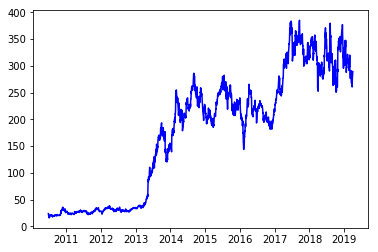

In [98]:

plt.plot(df_tsla.DateTime, df_tsla["Adj Close"],color="blue")


In [99]:
df_tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime,year,month,day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010-06-29,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010-06-30,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010-07-01,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010-07-02,2010,7,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010-07-06,2010,7,6


In [100]:
#selecting stock price data during the same time range as above
df_tsla_chairman=df_tsla[(df_tsla['DateTime']<"2018-12-01") & (df_tsla['DateTime'] >"2018-09-26")]

In [101]:
df_tsla_chairman

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime,year,month,day
2077,2018-09-27,312.899994,314.959991,306.910004,307.519989,307.519989,8509100,2018-09-27,2018,9,27
2078,2018-09-28,270.260010,278.000000,260.559998,264.769989,264.769989,33649700,2018-09-28,2018,9,28
2079,2018-10-01,305.769989,311.440002,301.049988,310.700012,310.700012,21777600,2018-10-01,2018,10,1
2080,2018-10-02,313.950012,316.839996,299.149994,301.019989,301.019989,11743500,2018-10-02,2018,10,2
2081,2018-10-03,303.329987,304.600006,291.570007,294.799988,294.799988,7995000,2018-10-03,2018,10,3
2082,2018-10-04,293.950012,294.000000,277.670013,281.829987,281.829987,9814200,2018-10-04,2018,10,4
2083,2018-10-05,274.649994,274.880005,260.000000,261.950012,261.950012,17944500,2018-10-05,2018,10,5
2084,2018-10-08,264.519989,267.760010,249.000000,250.559998,250.559998,13472700,2018-10-08,2018,10,8
2085,2018-10-09,255.250000,266.769989,253.300003,262.799988,262.799988,12060600,2018-10-09,2018,10,9
2086,2018-10-10,264.609985,265.510010,247.770004,256.880005,256.880005,12815300,2018-10-10,2018,10,10


(array([736966., 736968., 736975., 736982., 736989., 736996., 736999.,
        737006., 737013., 737020., 737027., 737029.]),
 <a list of 12 Text xticklabel objects>)

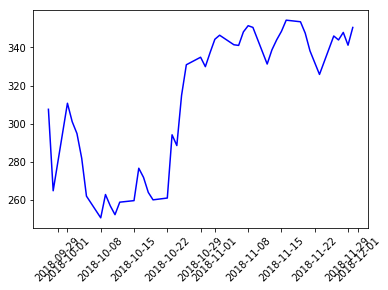

In [102]:
plt.plot(df_tsla_chairman.DateTime, df_tsla_chairman["Adj Close"],color="blue")
plt.xticks(rotation=45)

In [103]:
#no clear trend of price being impacted by change of tsla chair, so narrow date range to dig deeper

In [104]:
#new chairman announced on 11/8, so we want to see the tsla price one week before and prior that announcement
df_tsla_r=df_tsla[(df_tsla['DateTime']<"2018-11-15") & (df_tsla['DateTime']>"2018-11-1")]

In [107]:
df_tsla_r

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime,year,month,day
2103,2018-11-02,343.739990,349.200012,340.910004,346.410004,346.410004,7808000,2018-11-02,2018,11,2
2104,2018-11-05,340.500000,343.959991,330.140015,341.399994,341.399994,7831000,2018-11-05,2018,11,5
2105,2018-11-06,339.070007,348.799988,336.089996,341.059998,341.059998,6762900,2018-11-06,2018,11,6
2106,2018-11-07,343.339996,351.179993,340.799988,348.160004,348.160004,7374500,2018-11-07,2018,11,7
2107,2018-11-08,348.500000,357.579987,348.440002,351.399994,351.399994,7090700,2018-11-08,2018,11,8
2108,2018-11-09,349.000000,354.000000,345.230011,350.510010,350.510010,5098800,2018-11-09,2018,11,9
2109,2018-11-12,348.369995,349.779999,330.339996,331.279999,331.279999,6941500,2018-11-12,2018,11,12
2110,2018-11-13,333.160004,344.700012,332.200012,338.730011,338.730011,5448600,2018-11-13,2018,11,13
2111,2018-11-14,342.700012,347.109985,337.149994,344.000000,344.000000,5040300,2018-11-14,2018,11,14


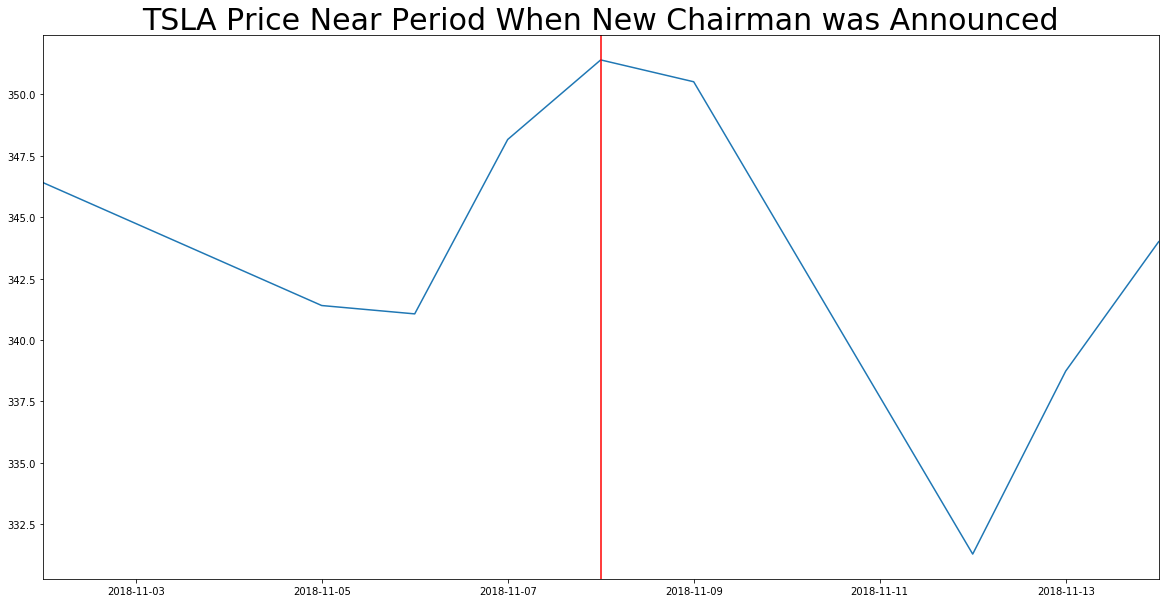

In [108]:
x=df_tsla_r["DateTime"]
y=df_tsla_r["Close"]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title("TSLA Price Near Period When New Chairman was Announced", fontsize=30)
ax.set_xlim(('2018-11-02', '2018-11-14'))

ax.axvline(x='2018-11-08', color='red')


plt.show()


In [64]:
#explore intraday price difference on these days

In [109]:
df_tsla_r["Change"] = df_tsla_r["Close"]-df_tsla_r["Open"]
df_tsla_r["%Change"] = df_tsla_r["Change"]/df_tsla_r["Open"]*100
df_tsla_r["%Change"]

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2103    0.776754
2104    0.264315
2105    0.586897
2106    1.403859
2107    0.832136
2108    0.432668
2109   -4.905703
2110    1.671871
2111    0.379337
Name: %Change, dtype: float64

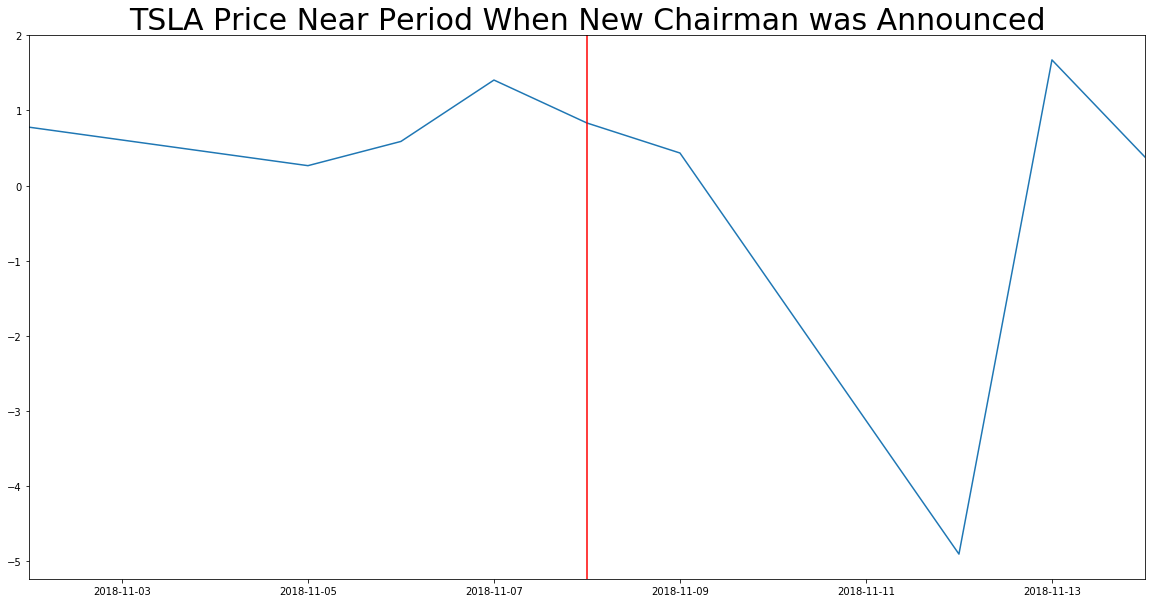

In [110]:

x=df_tsla_r["DateTime"]
y=df_tsla_r["%Change"]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title("TSLA Price Near Period When New Chairman was Announced", fontsize=30)
ax.set_xlim(('2018-11-02', '2018-11-14'))

ax.axvline(x='2018-11-08', color='red')


plt.show()


In [111]:
#Did sth happen on 2018-11-12 or is the dip due to this news?

In [112]:
#filter tweets within +- five days of 2018/11/12 to see if there was a big event from tesla
df_tesla_sth=df_tesla_short_sort[(df_tesla_short_sort['DateTime']<="2018-11-17")&(df_tesla_short_sort["DateTime"]>="2018-11-07")]
df_tesla_sth

,retweets,favorites,text,DateTime,year,month,day
154,2581,14822,How Track Mode Works,2018-11-08 17:52:00,2018,11,8
151,1536,10806,"50 MWh of Powerpack storage linked with the Gannawarra Solar Farm now supporting the grid in Victoria, Australia pic.twitter.com/hKirS3ue7U",2018-11-15 22:19:00,2018,11,15
155,1185,10943,Announcing Robyn Denholm as Tesla’s New Board Chair https:// ts.la/2Db7StX,2018-11-08 06:44:00,2018,11,8
156,336,3874,Navigate on Autopilot review by @businessinsider https://www. businessinsider.com.au/teslas-navigat e-on-autopilot-review-2018-11 …,2018-11-07 21:25:00,2018,11,7
153,42,456,Track Mode starts rolling out today,2018-11-08 18:11:00,2018,11,8
152,5,322,You have to be in Park,2018-11-09 01:49:00,2018,11,9
150,2,33,Yes http:// ts.la/2qOpyUD,2018-11-16 17:48:00,2018,11,16


In [113]:
#can most likely designate the dip to the chairman news

# Investigate whether Elon's April Fools Tweets impact TSLA stock price

In [114]:
#get tsla stock price from 3/29 to 4/4 of each year
df_tsla_aprilfools=df_tsla[((df_tsla['month']==4) & (df_tsla['day']==1)) |
                           ((df_tsla['month']==3) & (df_tsla['day']==31)) |
                           ((df_tsla['month']==4) & (df_tsla['day']==2))|
                           ((df_tsla['month']==3) & (df_tsla['day']==30)) |
                           ((df_tsla['month']==4) & (df_tsla['day']==3))|
                           ((df_tsla['month']==3) & (df_tsla['day']==29)) |
                           ((df_tsla['month']==4) & (df_tsla['day']==4))]


In [115]:
df_tsla_aprilfools


,Date,Open,High,Low,Close,Adj Close,Volume,DateTime,year,month,day
189,2011-03-29,23.299999,24.000000,23.209999,23.920000,23.920000,755400,2011-03-29,2011,3,29
190,2011-03-30,24.110001,24.490000,23.010000,23.709999,23.709999,1223300,2011-03-30,2011,3,30
191,2011-03-31,26.549999,28.709999,26.500000,27.750000,27.750000,11517800,2011-03-31,2011,3,31
192,2011-04-01,27.450001,28.180000,26.570000,26.660000,26.660000,2864800,2011-04-01,2011,4,1
193,2011-04-04,26.830000,27.000000,25.230000,25.830000,25.830000,2609300,2011-04-04,2011,4,4
442,2012-03-29,38.189999,38.189999,37.029999,37.330002,37.330002,796400,2012-03-29,2012,3,29
443,2012-03-30,37.520000,37.939999,36.680000,37.240002,37.240002,886400,2012-03-30,2012,3,30
444,2012-04-02,37.330002,37.970001,36.529999,36.580002,36.580002,1028600,2012-04-02,2012,4,2
445,2012-04-03,36.700001,38.470001,36.669998,38.009998,38.009998,1098100,2012-04-03,2012,4,3
446,2012-04-04,35.270000,35.490002,34.689999,35.000000,35.000000,4481800,2012-04-04,2012,4,4


(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695., 737060.]), <a list of 10 Text xticklabel objects>)

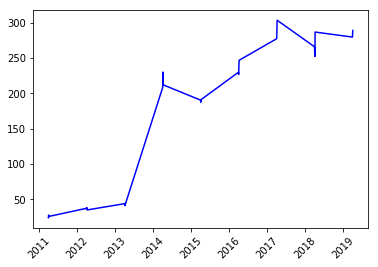

In [116]:
plt.plot(df_tsla_aprilfools.DateTime, df_tsla_aprilfools["Adj Close"],color="blue")
plt.xticks(rotation=45)

In [117]:
#not always the same trend (ex: 2014 price spiked up, 2018 price dropped)

In [118]:
#read in cleaned tweets from Elon (more lines of tweet text are shown)
df_better=pd.read_csv("../../data/twitter/2019_04_06_elon_aggregate.csv")

In [119]:
df_better['DateTime'] = pd.to_datetime(df_better['adj_date'])
df_better['year']= df_better['DateTime'].dt.year
df_better['month']=df_better['DateTime'].dt.month
df_better['day']=df_better['DateTime'].dt.day

In [120]:
#find all the tweets from April 1
df_better_aprilfools=df_better[(df_better.month==4)&(df_better.day==1)]

In [121]:
df_better_aprilfools

,adj_date,text,retweets,favorites,mentions,hashtags,permalink,DateTime,year,month,day
56,2012-04-01,"UN must take responsibility & help people of Haiti. MT @brynmooser : Front page NYTimes. http://www. nytimes.com/2012/04/01/wor ld/americas/haitis-cholera-outraced-the-experts-and-tainted-the-un.html?hp … ”""",9,2,@brynmooser,NaN,https://twitter.com/elonmusk/status/186524431231889408,2012-04-01,2012,4,1
194,2013-04-01,"@stopman Thanks Michael. Beauty of over the air software updates is that the product keeps improving even after you buy it.\n@jeremys Thanks Jeremy! Good seeing you in LA. Awesome job with Yelp!\nTo be clear, Tesla is in California, so it is not April Fool's yet! Also, some may differ, but imo the Tues news is arguably more important.\nFirst profitable Q for Tesla thanks to awesome customers & hard work by a super dedicated team http://www. teslamotors.com/about/press/re leases/tesla-model-s...",660,391,@stopman @jeremys,,https://twitter.com/elonmusk/status/318826190725074944 https://twitter.com/elonmusk/status/318820033839128576 https://twitter.com/elonmusk/status/318588682070269952 https://twitter.com/elonmusk/status/318586284065054720,2013-04-01,2013,4,1
326,2014-04-01,Announcing a revolutionary Tesla driving technology http:// teslamotors.com/blog/pet-drivi ng-cars …,703,643,NaN,NaN,https://twitter.com/elonmusk/status/451094706479308800,2014-04-01,2014,4,1
434,2015-04-01,Announcing the amazing Tesla Model W http://www. teslamotors.com/blog/announcin g-tesla-model-w …,1726,2119,NaN,NaN,https://twitter.com/elonmusk/status/583360210292477952,2015-04-01,2015,4,1
562,2016-04-01,"@GrahamABlair of course :)\n@Jbourquee Giga is designed to self-power via solar panels (primarily), wind & geo, using its own batteries to store electricity at night.\n@steveagee def on the cards for the future\n@JackLipstone should be within a week or two max\n@Alyssa_Milano Hi Alyssa, thanks for placing your faith in Tesla. I hope you have a great experience with the car.\nDefinitely going to need to rethink production planning...\nThought it would slow way down today, but Model 3 order co...",27630,56716,@GrahamABlair @Jbourquee @steveagee @JackLipstone @Alyssa_Milano @IndiaToday @Oatmeal @StartUpRabbi @redletterdave @drew,,https://twitter.com/elonmusk/status/715999819437850624 https://twitter.com/elonmusk/status/715975692228243460 https://twitter.com/elonmusk/status/715974749982220288 https://twitter.com/elonmusk/status/715972980556193792 https://twitter.com/elonmusk/status/715971547475886083 https://twitter.com/elonmusk/status/715955186175459332 https://twitter.com/elonmusk/status/715952781895426048 https://twitter.com/elonmusk/status/715934657720639488 https://twitter.com/elonmusk/status/715776577485807621 h...,2016-04-01,2016,4,1
774,2017-04-01,"Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?\nTechnology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation\nDef P100D with Ludicrous+, although the rocket starts going a lot faster after that",12916,46651,,,https://twitter.com/elonmusk/status/848244577521647616 https://twitter.com/elonmusk/status/848243350993895424 https://twitter.com/elonmusk/status/848036043240636417,2017-04-01,2017,4,1
1015,2018-04-01,"What about this? https://www. youtube.com/watch?v=FG1NrQ YXjLU …\nElon University is a real place\nComing soon to Tesla merch. Free shots in stores every April 1st.\nAs you wish\nIt’s the best\nElon was found passed out against a Tesla Model 3, surrounded by Teslaquilla"" bottles, the tracks of dried tears still visible on his cheeks. This is not a forward-looking statement, because, obviously, what's the point? Happy New Month! pic.twitter.com/YcouvFz6Y1""\nThere are many chapters of bankrupt...",59302,397328,,,https://twitter.com/elonmusk/status/980589463611916288 https://twitter.com/elonmusk/status/980585671218774017 htt